## Unit 5 | Assignment - The Power of Plots

## Background

What good is data without a good plot to tell the story?

So, let's take what you've learned about Python Matplotlib and apply it to some real-world situations. For this assignment, you'll need to complete **1 of 2** Data Challenges. As always, it's your choice which you complete. _Perhaps_, choose the one most relevant to your future career.

## Option 1: Pyber

![Ride](Images/Ride.png)

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](Pyber/Pyber_Example.pdf) for a reference on expected format.



Observations:
1. There number of riders impacts the fare, the more riders around, the cheaper the fair
2. The numbers of riders changes based on city type -- Urban cities have the most riders, followed by suburban cities, and lastly, rural cities. 
3. There seems to be no relationship between number of drivers and city types. There are Urban cities with not many drivers, and rural cities, with many drivers. It seems to be completely unique to each city.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
ride_path = "raw_data/ride_data.csv"
city_path = "raw_data/city_data.csv"
rides = pd.read_csv(ride_path)
cities = pd.read_csv(city_path)
#print(rides.head())
#cities.head()

In [3]:
data = pd.merge(cities, rides, how="outer")
#data.head()
#data.count()

In [4]:
means = data.groupby("city").mean()
means.head()
sums = data.groupby("city").sum()
sums.head()
counts = data.groupby("city").count()
#counts["driver_count"].head()

In [16]:
# Create unique dfs for each city type
urban = data.loc[data["type"] == "Urban"]
suburbs = data.loc[data["type"] == "Suburban"]
rural = data.loc[data["type"] == "Rural"]
a = .65
ec = "white"
# plot each unique city type separately 
plt.scatter(urban.groupby("city").count()["fare"],
            urban.groupby("city").mean()["fare"],
            s = counts["driver_count"]*3,
            alpha = a,
            edgecolor = ec,
            label = "Urban",
            color = "gold")
plt.scatter(suburbs.groupby("city").count()["fare"],
            suburbs.groupby("city").mean()["fare"],
            s = counts["driver_count"]*3,
            alpha = a,
            edgecolor = ec,
            label = "Surburban",
            color = "cyan")
plt.scatter(rural.groupby("city").count()["fare"],
            rural.groupby("city").mean()["fare"],
            s = counts["driver_count"]*3,
            alpha = a,
            edgecolor = ec,
            label = "Rural",
            color = "coral")

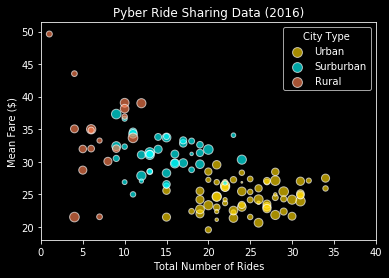

In [17]:
plt.style.use("dark_background")
#plt.scatter(counts["driver_count"],means["fare"],s = counts["driver_count"])
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides")
plt.ylabel("Mean Fare ($)")
plt.legend(title = "City Type")
plt.xlim(0,40)
plt.show()
## Circle Size Represents number of drivers in City
## xlim setting eliminates single city outside of range

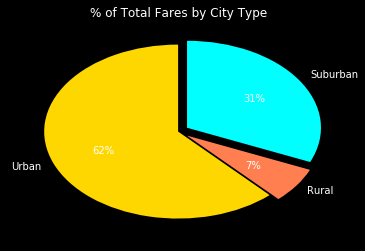

In [10]:
fare_urban = urban["fare"].sum()
fare_sub = suburbs["fare"].sum()
fare_rural = rural["fare"].sum()
fares = [fare_urban,
         fare_rural,
         fare_sub]
explode = (0, .08, .08)
colors = ["gold","coral","cyan"]
labels1 = "Urban","Rural","Suburban"
plt.pie(fares, labels = labels1, explode = explode, colors=colors, startangle = 90, autopct="%.0f%%")
plt.title("% of Total Fares by City Type")
plt.show()

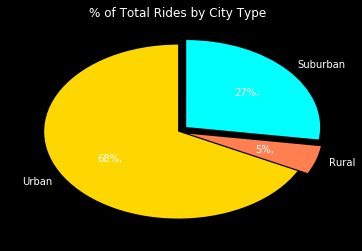

In [13]:
rides_urban = urban["fare"].count()
rides_sub = suburbs["fare"].count()
rides_rural = rural["fare"].count()
rides = [rides_urban,
         rides_rural,
         rides_sub]
explode = (0, .08, .08)
colors = ["gold","coral","cyan"]
labels2 = "Urban","Rural","Suburban"
plt.pie(rides, labels = labels2, explode = explode, colors = colors, startangle = 90, autopct="%.0f%%,")
plt.title("% of Total Rides by City Type")
plt.show()


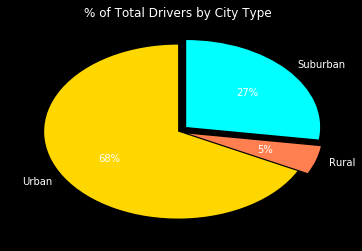

In [14]:
drivers_urban = urban["driver_count"].sum()
drivers_sub = suburbs["driver_count"].sum()
drivers_rural = rural["driver_count"].sum()
drivers = [drivers_urban,
           drivers_rural,
           drivers_sub]
explode = (0, .08, .08)
colors = ["gold","coral","cyan"]
labels3 = "Urban","Rural","Suburban"
plt.pie(rides, labels = labels3, explode = explode , colors = colors, startangle = 90, autopct="%.0f%%")
plt.title("% of Total Drivers by City Type")
plt.show()
